In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [240]:
df=pd.read_csv('loan.csv')

In [241]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# To find missing values

In [243]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [244]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

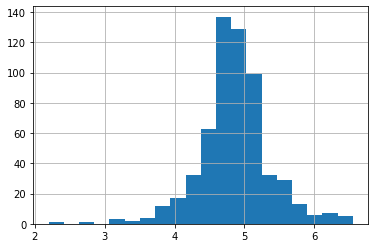

In [245]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [246]:
# Histogram is looking fine now check null values

In [247]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<AxesSubplot:>

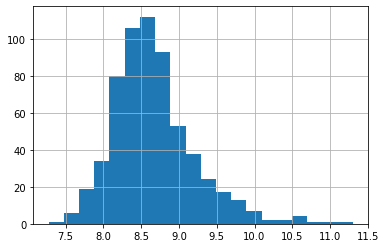

In [248]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

# Filling Null values

In [249]:
con=df.describe().columns

In [250]:
cat=df.columns.drop(con)

In [251]:
con

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'TotalIncome',
       'TotalIncome_log'],
      dtype='object')

In [252]:
cat=cat.drop('Loan_Status')

In [253]:
cat

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

In [254]:
df['ApplicantIncome'].mean()

5403.459283387622

In [255]:
df['Loan_ID'].mode()[0]

'LP001002'

In [256]:
for i in df[con]:
    df[i].replace(np.nan,df[i].mean(),inplace=True)
for i in cat:
    df[i].replace(np.nan,df[i].mode()[0],inplace=True)

In [257]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [258]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [259]:
X=df.drop(['Loan_ID','Loan_Status'],axis=1)

In [260]:
y=df['Loan_Status'];y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [261]:
print("per if missing Gender is %2f%%" %(df['Gender'].isnull().sum()/df.shape[0]))

per if missing Gender is 0.000000%


number of  people who take loan as group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


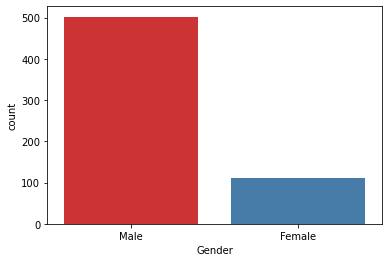

In [262]:
print("number of  people who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1');

number of  people who take loan as group by marrital status:
Yes    401
No     213
Name: Married, dtype: int64


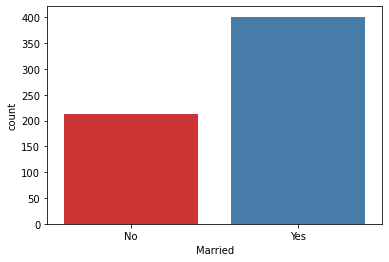

In [263]:
print("number of  people who take loan as group by marrital status:")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1');

number of  people who take loan as group by dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


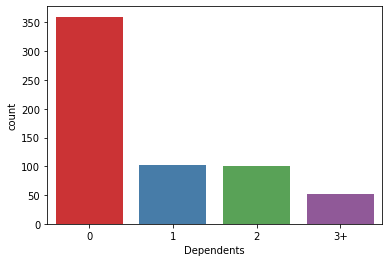

In [264]:
print("number of  people who take loan as group by dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1');

number of  people who take loan as group by self employeed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


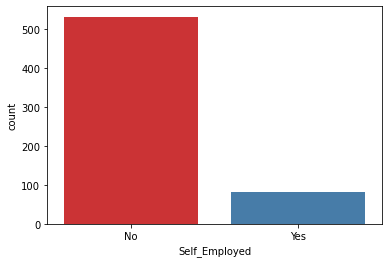

In [265]:
print("number of  people who take loan as group by self employeed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set1');

number of  people who take loan as group by Loan Amount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
211.000000     1
250.000000     1
62.000000      1
85.000000      1
436.000000     1
Name: LoanAmount, Length: 204, dtype: int64


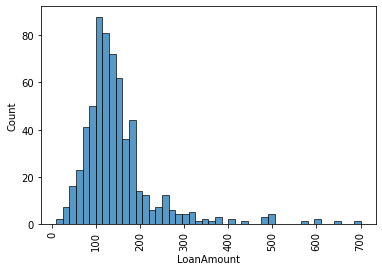

In [266]:
print("number of  people who take loan as group by Loan Amount:")
print(df['LoanAmount'].value_counts())
sns.histplot(x='LoanAmount',data=df,palette='Set1')
plt.xticks(rotation=90);

number of  people who take loan as group by credit history:
1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


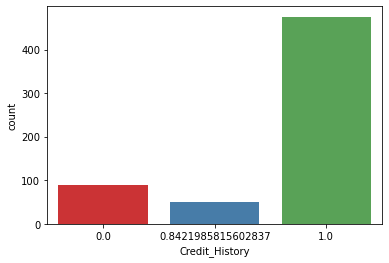

In [267]:
print("number of  people who take loan as group by credit history:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1');

In [268]:
from sklearn.preprocessing import LabelEncoder
Labelencoder=LabelEncoder()

In [269]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  LoanAmount_log     614 non-null    float64
 12  TotalIncome        614 non-null    float64
 13  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(1), object(6)
memory usage: 67.3+ KB


# Import sklearn for training and testing data set.

In [270]:
X.Gender=Labelencoder.fit_transform(X.Gender)
X.Married=Labelencoder.fit_transform(X.Married)
X.Dependents=Labelencoder.fit_transform(X.Dependents)
X.Education=Labelencoder.fit_transform(X.Education)
X.Self_Employed=Labelencoder.fit_transform(X.Self_Employed)

In [271]:
X.Property_Area=Labelencoder.fit_transform(X.Property_Area)
y=Labelencoder.fit_transform(y)

In [272]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,4.857444,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,4.852030,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,4.189655,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,4.787492,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,4.948760,6000.0,8.699515


In [273]:
X=X.drop('LoanAmount_log',axis=1)

In [274]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [275]:
X

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  1.22329839,
        -0.18218376,  0.00846848],
       [ 0.47234264,  0.72881553,  0.25346957, ..., -1.31851281,
        -0.14468416,  0.08290346],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  1.22329839,
        -0.62365632, -1.21736328],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  1.22329839,
         0.19947539,  0.65369887],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  1.22329839,
         0.08651172,  0.48516845],
       [-2.11710719, -1.37208932, -0.73780632, ..., -0.04760721,
        -0.37835935, -0.43936693]])

# Import sklearn for training and testing data set.

In [276]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size= 0.2, random_state=0)

In [277]:
from sklearn.ensemble import RandomForestClassifier

In [278]:
rf_clf= RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [279]:
from sklearn import metrics
y_pred= rf_clf.predict(X_test)
print("acc of random forest clf is", metrics.accuracy_score(y_pred,y_test))
y_pred

acc of random forest clf is 0.7886178861788617


array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [280]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [281]:
y_pred= nb_clf.predict(X_test)
print('acc of naive bayes is', metrics.accuracy_score(y_pred,y_test));y_pred

acc of naive bayes is 0.8292682926829268


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

Here  accuracy increased to 82% from 77%.

In [282]:
from sklearn.tree import DecisionTreeClassifier
df_clf= DecisionTreeClassifier()
df_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [283]:
y_pred= df_clf.predict(X_test)
print("acc of DT is",metrics.accuracy_score(y_pred,y_test)); y_pred

acc of DT is 0.6747967479674797


array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

Here accuarcy decreased by 67%

In [284]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf= KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [285]:
y_pred= kn_clf.predict(X_test)
print("accuracy of KNeighbors is :", metrics.accuracy_score(y_pred,y_test))

accuracy of KNeighbors is : 0.8211382113821138


Here accuracy again increased to 79.8%.